In [1]:
df = DataFrame({'key1':list('aabba'),
               'key2':['one','two','one','two','one'],
               'data1':np.random.randn(5),
               'data2':np.random.randn(5)})

In [3]:
df

,key1,key2,data1,data2
0,a,one,-0.421974,0.469832
1,a,two,0.174387,0.162985
2,b,one,0.791176,-0.346350
3,b,two,0.030570,-0.241184
4,a,one,1.152320,-0.405686


In [4]:
grouped = df['data1'].groupby(df['key1'])

In [5]:
grouped

In [7]:
grouped.describe()

,count,mean,std,min,25%,50%,75%,max
key1,,,,,,,,
a,3.0,0.301578,0.794817,-0.421974,-0.123793,0.174387,0.663354,1.152320
b,2.0,0.410873,0.537830,0.030570,0.220722,0.410873,0.601024,0.791176


In [17]:
df[['key1','data1']].groupby('key1').mean()

,data1
key1,
a,0.301578
b,0.410873


In [16]:
df[['key1','data1']]

,key1,data1
0,a,-0.421974
1,a,0.174387
2,b,0.791176
3,b,0.030570
4,a,1.152320


In [20]:
stats = np.array(['ohio','california','california','ohio','ohio'])
years = np.array([2005,2005,2006,2005,2006])

In [21]:
df['data1'].groupby([stats,years]).mean()

california  2005    0.174387
            2006    0.791176
ohio        2005   -0.195702
            2006    1.152320
Name: data1, dtype: float64

In [22]:
df.groupby('key1').mean()

,data1,data2
key1,,
a,0.301578,0.075710
b,0.410873,-0.293767


In [25]:
df.groupby('key1').describe()

data1                                                              \
     count      mean       std       min       25%       50%       75%   
key1                                                                     
a      3.0  0.301578  0.794817 -0.421974 -0.123793  0.174387  0.663354   
b      2.0  0.410873  0.537830  0.030570  0.220722  0.410873  0.601024   

               data2                                                    \
           max count      mean       std       min       25%       50%   
key1                                                                     
a     1.152320   3.0  0.075710  0.444236 -0.405686 -0.121351  0.162985   
b     0.791176   2.0 -0.293767  0.074364 -0.346350 -0.320059 -0.293767   

                          
           75%       max  
key1                      
a     0.316408  0.469832  
b    -0.267475 -0.241184

In [28]:
for name,group in df.groupby('key1'):
    print(name)
    print(group)

a
  key1 key2     data1     data2
0    a  one -0.421974  0.469832
1    a  two  0.174387  0.162985
4    a  one  1.152320 -0.405686
b
  key1 key2     data1     data2
2    b  one  0.791176 -0.346350
3    b  two  0.030570 -0.241184


In [32]:
df.groupby('key1')['data1'].mean()

key1
a    0.301578
b    0.410873
Name: data1, dtype: float64

In [35]:
pieces = dict(list(df.groupby('key1')))

In [44]:
pieces['a'].set_index(['key1','key2']).loc[('a','two'),'data1'].unstack()

c:\python36\lib\site-packages\pandas\core\indexing.py:1472: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


key2,two
key1,
a,0.174387


In [47]:
df.dtypes

key1      object
key2      object
data1    float64
data2    float64
dtype: object

In [10]:
people = DataFrame(np.random.randn(5,5),
                  columns=list('abcde'),
                  index=['joe','steve','wes','jim','travis'])

In [12]:
people

,a,b,c,d,e
joe,0.229368,-0.860243,0.421344,1.441181,-0.113431
steve,0.168466,1.272979,-1.568791,0.094130,0.444153
wes,0.096304,-0.415968,-0.160335,0.343735,0.610356
jim,-0.765150,0.949125,1.177671,-1.109552,-2.844584
travis,-1.078875,-1.224856,-1.962922,1.117572,-0.190721


In [52]:
people.loc[2:3,['b','c']]= np.nan

In [53]:
people

,a,b,c,d,e
joe,-0.220025,-1.256190,0.006339,1.223334,-1.460030
steve,-0.455532,-0.169069,-2.082521,1.321104,0.509316
wes,0.833916,NaN,NaN,-0.264604,-0.325989
jim,-0.997914,-1.001209,-0.852611,-0.020278,2.602777
travis,0.254893,-0.091928,0.661042,0.323968,0.102136


In [55]:
mappitng = {'a':'red','b':'red','c':'blue','d':'blue','e':'red','f':'orange'}

In [56]:
mappitng

{'a': 'red', 'b': 'red', 'c': 'blue', 'd': 'blue', 'e': 'red', 'f': 'orange'}

In [58]:
people.groupby(mappitng,axis=1).sum()

,blue,red
joe,1.229673,-2.936244
steve,-0.761417,-0.115285
wes,-0.264604,0.507927
jim,-0.872889,0.603654
travis,0.985010,0.265101


In [59]:
map_series = Series(mappitng)

In [60]:
map_series

a       red
b       red
c      blue
d      blue
e       red
f    orange
dtype: object

In [61]:
people.groupby(map_series,axis=1).sum()

,blue,red
joe,1.229673,-2.936244
steve,-0.761417,-0.115285
wes,-0.264604,0.507927
jim,-0.872889,0.603654
travis,0.985010,0.265101


In [62]:
people.groupby(len).sum()

,a,b,c,d,e
3,-0.384023,-2.257398,-0.846272,0.938453,0.816758
5,-0.455532,-0.169069,-2.082521,1.321104,0.509316
6,0.254893,-0.091928,0.661042,0.323968,0.102136


In [63]:
columns = pd.MultiIndex.from_arrays([['us','us','us','jp','jp'],[1,3,5,1,3]],names=['cty','tenor'])

In [64]:
hier_df = DataFrame(np.random.randn(4,5),columns=columns)

In [65]:
hier_df

cty          us                            jp          
tenor         1         3         5         1         3
0      0.037335  0.616592 -0.309635 -2.975028  0.374167
1      2.916820 -0.013423  2.314217  0.773501  0.952111
2      0.811875 -0.568809 -1.066911 -0.657273  0.300749
3      0.231939 -0.351377 -0.091168  0.828565  1.074871

In [66]:
hier_df.groupby(level=0,axis=1).count()

cty,jp,us
0,2,3
1,2,3
2,2,3
3,2,3


In [2]:
df

,key1,key2,data1,data2
0,a,one,-0.214684,-1.757486
1,a,two,-0.363279,-1.700296
2,b,one,0.117970,-0.351012
3,b,two,0.820743,-0.162933
4,a,one,-1.774532,-0.261478


In [5]:
k1_means = df.groupby('key1').mean().add_prefix('mean_')

In [6]:
k1_means

,mean_data1,mean_data2
key1,,
a,-0.784165,-1.239753
b,0.469356,-0.256972


In [8]:
df.merge(k1_means,how='left',left_on='key1',right_index=True)

,key1,key2,data1,data2,mean_data1,mean_data2
0,a,one,-0.214684,-1.757486,-0.784165,-1.239753
1,a,two,-0.363279,-1.700296,-0.784165,-1.239753
2,b,one,0.117970,-0.351012,0.469356,-0.256972
3,b,two,0.820743,-0.162933,0.469356,-0.256972
4,a,one,-1.774532,-0.261478,-0.784165,-1.239753


In [13]:
key = [1,2,1,2,1]

In [14]:
people.groupby(key).mean()

,a,b,c,d,e
1,-0.251068,-0.833689,-0.567304,0.967496,0.102068
2,-0.298342,1.111052,-0.195560,-0.507711,-1.200215


In [15]:
people

,a,b,c,d,e
joe,0.229368,-0.860243,0.421344,1.441181,-0.113431
steve,0.168466,1.272979,-1.568791,0.094130,0.444153
wes,0.096304,-0.415968,-0.160335,0.343735,0.610356
jim,-0.765150,0.949125,1.177671,-1.109552,-2.844584
travis,-1.078875,-1.224856,-1.962922,1.117572,-0.190721


In [16]:
people.groupby(key).transform(np.mean)

,a,b,c,d,e
joe,-0.251068,-0.833689,-0.567304,0.967496,0.102068
steve,-0.298342,1.111052,-0.195560,-0.507711,-1.200215
wes,-0.251068,-0.833689,-0.567304,0.967496,0.102068
jim,-0.298342,1.111052,-0.195560,-0.507711,-1.200215
travis,-0.251068,-0.833689,-0.567304,0.967496,0.102068


In [25]:
def top(df,n=5,column='tip_pct'):
    return df.sort_values(by=column)[-n:]

In [75]:
tips = pd.read_csv('pydata-book/examples/tips.csv')

In [27]:
tips['tip_pct'] = tips['tip'].div(tips['total_bill'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.059447
1,10.34,1.66,No,Sun,Dinner,3,0.160542
2,21.01,3.50,No,Sun,Dinner,3,0.166587
3,23.68,3.31,No,Sun,Dinner,2,0.139780
4,24.59,3.61,No,Sun,Dinner,4,0.146808


In [28]:
top(tips,n=6)

,total_bill,tip,smoker,day,time,size,tip_pct
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
232,11.61,3.39,No,Sat,Dinner,2,0.291990
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [46]:
tips.groupby('smoker').apply(top)['tip_pct'].unstack()

,51,67,88,109,149,172,178,183,185,232
smoker,,,,,,,,,,
No,0.252672,NaN,0.236746,NaN,0.266312,NaN,NaN,NaN,0.241663,0.29199
Yes,NaN,0.325733,NaN,0.279525,NaN,0.710345,0.416667,0.280535,NaN,NaN


In [55]:
tips.groupby(['smoker','day']).apply(top,n=1,column='total_bill')

total_bill    tip smoker   day    time  size   tip_pct
smoker day                                                             
No     Fri  94        22.75   3.25     No   Fri  Dinner     2  0.142857
       Sat  212       48.33   9.00     No   Sat  Dinner     4  0.186220
       Sun  156       48.17   5.00     No   Sun  Dinner     6  0.103799
       Thur 142       41.19   5.00     No  Thur   Lunch     5  0.121389
Yes    Fri  95        40.17   4.73    Yes   Fri  Dinner     4  0.117750
       Sat  170       50.81  10.00    Yes   Sat  Dinner     3  0.196812
       Sun  182       45.35   3.50    Yes   Sun  Dinner     3  0.077178
       Thur 197       43.11   5.00    Yes  Thur   Lunch     4  0.115982

In [56]:
ts = tips.groupby(['smoker','day']).apply(top,n=1,column='total_bill')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000000131A1320>,
      dtype=object)

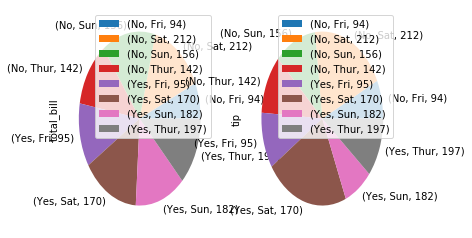

In [68]:
tips.groupby(['smoker','day']).apply(top,n=1,column='total_bill')[['total_bill','tip']].plot(kind='pie',subplots=True)

In [69]:
result = tips.groupby('smoker')['tip_pct'].describe()

In [70]:
result

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,0.159328,0.039910,0.056797,0.136906,0.155625,0.185014,0.291990
Yes,93.0,0.163196,0.085119,0.035638,0.106771,0.153846,0.195059,0.710345


In [75]:
result.T

smoker,No,Yes
count,151.000000,93.000000
mean,0.159328,0.163196
std,0.039910,0.085119
min,0.056797,0.035638
25%,0.136906,0.106771
50%,0.155625,0.153846
75%,0.185014,0.195059
max,0.291990,0.710345


In [76]:
tips.groupby('smoker',group_keys=False).apply(top)

,total_bill,tip,smoker,day,time,size,tip_pct
88,24.71,5.85,No,Thur,Lunch,2,0.236746
185,20.69,5.00,No,Sun,Dinner,5,0.241663
51,10.29,2.60,No,Sun,Dinner,2,0.252672
149,7.51,2.00,No,Thur,Lunch,2,0.266312
232,11.61,3.39,No,Sat,Dinner,2,0.291990
109,14.31,4.00,Yes,Sat,Dinner,2,0.279525
183,23.17,6.50,Yes,Sun,Dinner,4,0.280535
67,3.07,1.00,Yes,Sat,Dinner,1,0.325733
178,9.60,4.00,Yes,Sun,Dinner,2,0.416667
172,7.25,5.15,Yes,Sun,Dinner,2,0.710345


In [77]:
tips.groupby?

In [84]:
tips.groupby(['smoker','day']).apply(top)

total_bill   tip smoker   day    time  size   tip_pct
smoker day                                                            
No     Fri  99        12.46  1.50     No   Fri  Dinner     2  0.120385
            94        22.75  3.25     No   Fri  Dinner     2  0.142857
            91        22.49  3.50     No   Fri  Dinner     2  0.155625
            223       15.98  3.00     No   Fri   Lunch     3  0.187735
       Sat  228       13.28  2.72     No   Sat  Dinner     2  0.204819
            108       18.24  3.76     No   Sat  Dinner     2  0.206140
            110       14.00  3.00     No   Sat  Dinner     2  0.214286
            20        17.92  4.08     No   Sat  Dinner     2  0.227679
            232       11.61  3.39     No   Sat  Dinner     2  0.291990
       Sun  46        22.23  5.00     No   Sun  Dinner     2  0.224921
            17        16.29  3.71     No   Sun  Dinner     3  0.227747
            6          8.77  2.00     No   Sun  Dinner     2  0.228050
            185       20.69  5.00     No   Sun  Dinner     5  0.241663
            51        10.29  2.60     No   Sun  Dinner     2  0.252672
       Thur 81        16.66  3.40     No  Thur   Lunch     2  0.204082
            139       13.16  2.75     No  Thur   Lunch     2  0.208967
            87        18.28  4.00     No  Thur   Lunch     2  0.218818
            88        24.71  5.85     No  Thur   Lunch     2  0.236746
            149        7.51  2.00     No  Thur   Lunch     2  0.266312
Yes    Fri  226       10.09  2.00    Yes   Fri   Lunch     2  0.198216
            100       11.35  2.50    Yes   Fri  Dinner     2  0.220264
            222        8.58  1.92    Yes   Fri   Lunch     1  0.223776
            221       13.42  3.48    Yes   Fri   Lunch     2  0.259314
            93        16.32  4.30    Yes   Fri  Dinner     2  0.263480
       Sat  171       15.81  3.16    Yes   Sat  Dinner     2  0.199873
            63        18.29  3.76    Yes   Sat  Dinner     4  0.205577
            214       28.17  6.50    Yes   Sat  Dinner     3  0.230742
            109       14.31  4.00    Yes   Sat  Dinner     2  0.279525
            67         3.07  1.00    Yes   Sat  Dinner     1  0.325733
       Sun  174       16.82  4.00    Yes   Sun  Dinner     2  0.237812
            181       23.33  5.65    Yes   Sun  Dinner     2  0.242177
            183       23.17  6.50    Yes   Sun  Dinner     4  0.280535
            178        9.60  4.00    Yes   Sun  Dinner     2  0.416667
            172        7.25  5.15    Yes   Sun  Dinner     2  0.710345
       Thur 204       20.53  4.00    Yes  Thur   Lunch     4  0.194837
            205       16.47  3.23    Yes  Thur   Lunch     3  0.196114
            191       19.81  4.19    Yes  Thur   Lunch     2  0.211509
            200       18.71  4.00    Yes  Thur   Lunch     3  0.213789
            194       16.58  4.00    Yes  Thur   Lunch     2  0.241255

In [85]:
frame = DataFrame({'data1':np.random.randn(1000),
                  'data2':np.random.randn(1000)})

In [87]:
factor = pd.cut(frame.data1,4)

In [89]:
factor[:10]

0     (0.187, 2.015]
1     (0.187, 2.015]
2    (-1.641, 0.187]
3     (0.187, 2.015]
4    (-1.641, 0.187]
5    (-1.641, 0.187]
6     (0.187, 2.015]
7     (0.187, 2.015]
8     (0.187, 2.015]
9    (-1.641, 0.187]
Name: data1, dtype: category
Categories (4, interval[float64]): [(-3.476, -1.641] < (-1.641, 0.187] < (0.187, 2.015] < (2.015, 3.843]]

In [90]:
s=Series(np.random.randn(6))

In [91]:
s

0   -0.102020
1   -0.515756
2   -0.242140
3    0.788347
4   -0.490844
5   -0.928150
dtype: float64

In [92]:
s[::2]=np.nan

In [93]:
s

0         NaN
1   -0.515756
2         NaN
3    0.788347
4         NaN
5   -0.928150
dtype: float64

In [94]:
s.fillna(s.mean())

0   -0.218520
1   -0.515756
2   -0.218520
3    0.788347
4   -0.218520
5   -0.928150
dtype: float64

In [106]:
states = ['ohio','newyork','vermont','florida','oregon','nevada','california','idao']

In [107]:
groupby = ['east'] * 4 + ['west'] * 4

In [109]:
data = Series(np.random.randn(8),index=states)

In [110]:
data

ohio         -2.561066
newyork       0.506950
vermont       0.438757
florida      -2.491514
oregon        0.221102
nevada        0.611650
california    1.336321
idao         -0.391605
dtype: float64

In [111]:
fill_values = {'east':0.5,'west':1}

In [113]:
data[['vermont','nevada','idao']] = np.nan

In [114]:
data

ohio         -2.561066
newyork       0.506950
vermont            NaN
florida      -2.491514
oregon        0.221102
nevada             NaN
california    1.336321
idao               NaN
dtype: float64

In [125]:
fill_func = lambda g:g.fillna(fill_values[g.name])

In [126]:
data.groupby(groupby).apply(fill_func)

ohio         -2.561066
newyork       0.506950
vermont       0.500000
florida      -2.491514
oregon        0.221102
nevada        1.000000
california    1.336321
idao          1.000000
dtype: float64

In [127]:
suits = ['H','S','C','D']

In [162]:
card_val = ([x for x in range(1,11)] + [10] * 3) * 4

In [166]:
base_names = ['A'] + [x for x in range(2,11)]  + ['J','Q','K']

In [167]:
base_names

['A', 2, 3, 4, 5, 6, 7, 8, 9, 10, 'J', 'Q', 'K']

In [168]:
cards = []

In [169]:
for suit in suits:
    cards.extend(str(num)+ suit for num in base_names)

In [170]:
cards

['AH',
 '2H',
 '3H',
 '4H',
 '5H',
 '6H',
 '7H',
 '8H',
 '9H',
 '10H',
 'JH',
 'QH',
 'KH',
 'AS',
 '2S',
 '3S',
 '4S',
 '5S',
 '6S',
 '7S',
 '8S',
 '9S',
 '10S',
 'JS',
 'QS',
 'KS',
 'AC',
 '2C',
 '3C',
 '4C',
 '5C',
 '6C',
 '7C',
 '8C',
 '9C',
 '10C',
 'JC',
 'QC',
 'KC',
 'AD',
 '2D',
 '3D',
 '4D',
 '5D',
 '6D',
 '7D',
 '8D',
 '9D',
 '10D',
 'JD',
 'QD',
 'KD']

In [171]:
deck = Series(card_val,index=cards)

In [172]:
deck

AH      1
2H      2
3H      3
4H      4
5H      5
6H      6
7H      7
8H      8
9H      9
10H    10
JH     10
QH     10
KH     10
AS      1
2S      2
3S      3
4S      4
5S      5
6S      6
7S      7
8S      8
9S      9
10S    10
JS     10
QS     10
KS     10
AC      1
2C      2
3C      3
4C      4
5C      5
6C      6
7C      7
8C      8
9C      9
10C    10
JC     10
QC     10
KC     10
AD      1
2D      2
3D      3
4D      4
5D      5
6D      6
7D      7
8D      8
9D      9
10D    10
JD     10
QD     10
KD     10
dtype: int64

In [179]:
deck.take([3,10])

4H     4
JH    10
dtype: int64

In [181]:
np.random.permutation(10)

array([6, 0, 9, 1, 7, 4, 2, 3, 8, 5])

In [4]:
df = DataFrame({'category': list('aaaabbbb'),
              'data':np.random.randn(8),
              'weights':np.random.rand(8)})

In [5]:
df

,category,data,weights
0,a,1.108922,0.952423
1,a,-1.009933,0.565555
2,a,1.019678,0.486795
3,a,-0.672338,0.242103
4,b,0.595937,0.609180
5,b,1.836469,0.817079
6,b,0.680854,0.864984
7,b,-0.133744,0.069099


In [7]:
df.describe()

,data,weights
count,8.000000,8.000000
mean,0.428231,0.575902
std,0.962409,0.307276
min,-1.009933,0.069099
25%,-0.268393,0.425622
50%,0.638395,0.587368
75%,1.041989,0.829055
max,1.836469,0.952423


In [8]:
grouped = df.groupby('category')

In [9]:
grouped.mean()

,data,weights
category,,
a,0.111582,0.561719
b,0.744879,0.590086


In [13]:
get_wavg = lambda g: np.average(g['data'],weights=g['weights'])

In [14]:
grouped.apply(get_wavg)

category
a    0.364323
b    1.035129
dtype: float64

In [23]:
close_px = pd.read_csv('./pydata-book/examples/stock_px.csv',parse_dates=True,index_col=0)

In [24]:
close_px.head()

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990-02-01,4.98,7.86,2.87,16.79,4.27,0.51,6.04,328.79,6.12
1990-02-02,5.04,8.00,2.87,16.89,4.37,0.51,6.09,330.92,6.24
1990-02-05,5.07,8.18,2.87,17.32,4.34,0.51,6.05,331.85,6.25
1990-02-06,5.01,8.12,2.88,17.56,4.32,0.51,6.15,329.66,6.23
1990-02-07,5.04,7.77,2.91,17.93,4.38,0.51,6.17,333.75,6.33


In [50]:
rets = close_px.pct_change().dropna()

In [31]:
pets[-5:]

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
2011-10-10,0.039135,0.051406,0.041290,0.023192,0.020592,0.026286,0.013930,0.034125,0.036977
2011-10-11,0.020813,0.029526,0.000000,-0.008681,-0.007295,0.002227,-0.014870,0.000544,-0.000131
2011-10-12,-0.024272,0.004747,0.016109,0.006054,0.005785,-0.001481,0.028712,0.009795,0.011669
2011-10-13,0.004975,0.015515,-0.010976,0.003761,-0.001554,0.008160,-0.005423,-0.002974,-0.010238
2011-10-14,0.015842,0.033225,0.023428,0.019859,0.007629,0.003311,-0.001924,0.017380,0.022784


In [35]:
spx_corr = lambda x : x.corrwith(x['SPX'])

In [42]:
pets.groupby(lambda x :x.year).apply(spx_corr)

,AA,AAPL,GE,IBM,JNJ,MSFT,PEP,SPX,XOM
1990,0.595024,0.545067,0.752187,0.738361,0.801145,0.586691,0.783168,1.0,0.517586
1991,0.453574,0.365315,0.759607,0.557046,0.646401,0.524225,0.641775,1.0,0.569335
1992,0.398180,0.498732,0.632685,0.262232,0.515740,0.492345,0.473871,1.0,0.318408
1993,0.259069,0.238578,0.447257,0.211269,0.451503,0.425377,0.385089,1.0,0.318952
1994,0.428549,0.268420,0.572996,0.385162,0.372962,0.436585,0.450516,1.0,0.395078
1995,0.291532,0.161829,0.519126,0.416390,0.315733,0.453660,0.413144,1.0,0.368752
1996,0.292344,0.191482,0.750724,0.388497,0.569232,0.564015,0.421477,1.0,0.538736
1997,0.564427,0.211435,0.827512,0.646823,0.703538,0.606171,0.509344,1.0,0.695653
1998,0.533802,0.379883,0.815243,0.623982,0.591988,0.698773,0.494213,1.0,0.369264
1999,0.099033,0.425584,0.710928,0.486167,0.517061,0.631315,0.336593,1.0,0.315383


In [44]:
!pip install statsmodels

In [71]:
import statsmodels.api as sm
def regress(data,yvar,xvars):
    x=data[yvar]
    y=data[xvars]
    x['intercept'] = 1
    result = sm.OLS(y,x).fit()
    return result.params

In [51]:
by_year = rets.groupby(lambda x : x.year)

In [72]:
by_year.apply(regress,['AAPL'],['SPX'])

,AAPL,intercept
1990,0.196393,-0.000226
1991,0.112398,0.000791
1992,0.135740,0.000121
1993,0.040935,0.000377
1994,0.060532,-0.000137
1995,0.030494,0.001190
1996,0.044208,0.000806
1997,0.059612,0.001196
1998,0.123917,0.000368
1999,0.130775,0.000205


In [73]:
sm.OLS?

In [77]:
tips[-2:]

,total_bill,tip,smoker,day,time,size
242,17.82,1.75,No,Sat,Dinner,2
243,18.78,3.00,No,Thur,Dinner,2


In [82]:
tips.pivot_table(index=['smoker','day'])

size       tip  total_bill
smoker day                                 
No     Fri   2.250000  2.812500   18.420000
       Sat   2.555556  3.102889   19.661778
       Sun   2.929825  3.167895   20.506667
       Thur  2.488889  2.673778   17.113111
Yes    Fri   2.066667  2.714000   16.813333
       Sat   2.476190  2.875476   21.276667
       Sun   2.578947  3.516842   24.120000
       Thur  2.352941  3.030000   19.190588

In [92]:
tips.pivot_table(values=['size','tip'],index=['smoker','day'],columns=['time'],margins=True,aggfunc=[len,sum])

len                                   sum                      \
              size               tip                size                 tip   
time        Dinner Lunch  All Dinner Lunch    All Dinner  Lunch  All  Dinner   
smoker day                                                                     
No     Fri     3.0   1.0    4    3.0   1.0    4.0    6.0    3.0    9    8.25   
       Sat    45.0   NaN   45   45.0   NaN   45.0  115.0    NaN  115  139.63   
       Sun    57.0   NaN   57   57.0   NaN   57.0  167.0    NaN  167  180.57   
       Thur    1.0  44.0   45    1.0  44.0   45.0    2.0  110.0  112    3.00   
Yes    Fri     9.0   6.0   15    9.0   6.0   15.0   20.0   11.0   31   27.03   
       Sat    42.0   NaN   42   42.0   NaN   42.0  104.0    NaN  104  120.77   
       Sun    19.0   NaN   19   19.0   NaN   19.0   49.0    NaN   49   66.82   
       Thur    NaN  17.0   17    NaN  17.0   17.0    NaN   40.0   40     NaN   
All          176.0  68.0  244  176.0  68.0  244.0  463.0  164.0  627  546.07   

                             
                             
time          Lunch     All  
smoker day                   
No     Fri     3.00   11.25  
       Sat      NaN  139.63  
       Sun      NaN  180.57  
       Thur  117.32  120.32  
Yes    Fri    13.68   40.71  
       Sat      NaN  120.77  
       Sun      NaN   66.82  
       Thur   51.51   51.51  
All          185.51  731.58

In [128]:
tips.groupby(['smoker','day','time'])['size','tip'].agg(['sum','count']).unstack().swaplevel(0,1,axis=1)

sum         count           sum          count      
              size          size           tip            tip      
time        Dinner  Lunch Dinner Lunch  Dinner   Lunch Dinner Lunch
smoker day                                                         
No     Fri     6.0    3.0    3.0   1.0    8.25    3.00    3.0   1.0
       Sat   115.0    NaN   45.0   NaN  139.63     NaN   45.0   NaN
       Sun   167.0    NaN   57.0   NaN  180.57     NaN   57.0   NaN
       Thur    2.0  110.0    1.0  44.0    3.00  117.32    1.0  44.0
Yes    Fri    20.0   11.0    9.0   6.0   27.03   13.68    9.0   6.0
       Sat   104.0    NaN   42.0   NaN  120.77     NaN   42.0   NaN
       Sun    49.0    NaN   19.0   NaN   66.82     NaN   19.0   NaN
       Thur    NaN   40.0    NaN  17.0     NaN   51.51    NaN  17.0

In [108]:
pd.crosstab(values=tips.size,index=[tips.smoker,tips.day],columns=[tips.time],margins=True,aggfunc=sum)

time           Dinner    Lunch     All
smoker day                            
No     Fri     4392.0   1464.0    5856
       Sat    65880.0      NaN   65880
       Sun    83448.0      NaN   83448
       Thur    1464.0  64416.0   65880
Yes    Fri    13176.0   8784.0   21960
       Sat    61488.0      NaN   61488
       Sun    27816.0      NaN   27816
       Thur       NaN  24888.0   24888
All          257664.0  99552.0  357216

In [58]:
fec = pd.read_csv('./pydata-book/datasets/fec/P00000001-ALL.csv')

c:\python36\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [59]:
fec.describe().astype('int')

,contb_receipt_amt,file_num
count,1001731,1001731
mean,298,774494
std,3749,10598
min,-30800,723511
25%,35,771927
50%,100,779225
75%,250,780234
max,2014490,787803


In [60]:
fec.loc[10]

cmte_id                       C00410118
cand_id                       P20002978
cand_nm              Bachmann, Michelle
contbr_nm            ATCHLEY, JR, KEITH
contbr_city                        MESA
contbr_st                            AZ
contbr_zip                        85215
contbr_employer                    NONE
contbr_occupation               RETIRED
contb_receipt_amt                   250
contb_receipt_dt              22-JUN-11
receipt_desc                        NaN
memo_cd                             NaN
memo_text                           NaN
form_tp                           SA17A
file_num                         736166
Name: 10, dtype: object

In [61]:
unique_cands = fec.cand_nm.unique()

In [62]:
unique_cands = list(unique_cands)

In [63]:
unique_cands.sort()

In [64]:
unique_cands

['Bachmann, Michelle',
 'Cain, Herman',
 'Gingrich, Newt',
 'Huntsman, Jon',
 'Johnson, Gary Earl',
 'McCotter, Thaddeus G',
 'Obama, Barack',
 'Paul, Ron',
 'Pawlenty, Timothy',
 'Perry, Rick',
 "Roemer, Charles E. 'Buddy' III",
 'Romney, Mitt',
 'Santorum, Rick']

In [65]:
parties = {'Bachmann, Michelle':'Republican',
 'Cain, Herman':'Republican',
 'Gingrich, Newt':'Republican',
 'Huntsman, Jon':'Republican',
 'Johnson, Gary Earl':'Republican',
 'McCotter, Thaddeus G':'Republican',
 'Obama, Barack':'Dwmocrat',
 'Paul, Ron':'Republican',
 'Pawlenty, Timothy':'Republican',
 'Perry, Rick':'Republican',
 "Roemer, Charles E. 'Buddy' III":'Republican',
 'Romney, Mitt':'Republican',
 'Santorum, Rick':'Republican'}

In [66]:
fec['party'] = fec.cand_nm.map(parties)

In [67]:
fec.head()

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,3.68633e+08,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican


In [68]:
fec.party.value_counts()

Dwmocrat      593746
Republican    407985
Name: party, dtype: int64

In [70]:
(fec.contb_receipt_amt > 0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [71]:
fec = fec[fec.contb_receipt_amt > 0]

In [73]:
fec_mrbo = fec[fec.cand_nm.isin(['Obama, Barack','Romney, Mitt'])]

In [79]:
fec_mrbo.contb_receipt_amt.agg(['sum','count'])

sum      2.242133e+08
count    6.942820e+05
Name: contb_receipt_amt, dtype: float64

In [81]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [120]:
occ_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUESTED':'NOT PROVIDED',
    'INFORMATION REQUESTED (BEST EFFORTS)':'NOT PROVIDED',
    'C.E.O.':'CEO'
}

In [83]:
fec['occ'] = fec.contbr_occupation.map(occ_mapping)

In [104]:
fec['occ'].isnull()[:10]
fec['occ'].isna()[:10]

0     True
1     True
2    False
3     True
4     True
5     True
6    False
7     True
8     True
9     True
Name: occ, dtype: bool

0     True
1     True
2    False
3     True
4     True
5     True
6    False
7     True
8     True
9     True
Name: occ, dtype: bool

In [106]:
fec[fec['occ'].isnull()]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party,occ,occ1
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,NaN,RETIRED
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,3.6601e+08,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,NaN,RETIRED
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican,NaN,RETIRED
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,7.19016e+08,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,NaN,RETIRED
5,C00410118,P20002978,"Bachmann, Michelle","BECKMAN, JAMES",SPRINGDALE,AR,7.27647e+08,NONE,RETIRED,500.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,NaN,RETIRED
7,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,7.24548e+08,NONE,RETIRED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican,NaN,RETIRED
8,C00410118,P20002978,"Bachmann, Michelle","COLLINS, SARAH",MESA,AZ,8.52107e+08,ST. JOSEPH HOSPITAL,RN,250.0,21-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,NaN,RN
9,C00410118,P20002978,"Bachmann, Michelle","COLEMAN, RONALD",TUCSON,AZ,8.57499e+08,RAYTHEON,ELECTRICAL ENGINEER,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,NaN,ELECTRICAL ENGINEER
10,C00410118,P20002978,"Bachmann, Michelle","ATCHLEY, JR, KEITH",MESA,AZ,85215,NONE,RETIRED,250.0,22-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,NaN,RETIRED
11,C00410118,P20002978,"Bachmann, Michelle","FARNSWORTH, ROSS",MESA,AZ,8.52062e+08,FARNSWORTH COMPANIES,LAND DEVELOPER,500.0,22-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican,NaN,LAND DEVELOPER


In [121]:
fec.contbr_occupation = fec.contbr_occupation.map(lambda x : occ_mapping.get(x,x))

In [108]:
emp_mapping = {
    'INFORMATION REQUESTED PER BEST EFFORTS':'NOT PROVIDED',
    'INFORMATION REQUESTED':'NOT PROVIDED',
    'SELF':'SELF-EMPLOYED',
    'SELF EMPLOYED':'SELF-EMPLOYED'
}

In [109]:
fec.contbr_employer = fec.contbr_employer.map(lambda x : emp_mapping.get(x,x))

In [122]:
by_occupation = fec.pivot_table('contb_receipt_amt',index='contbr_occupation',columns='party',aggfunc='sum')

In [123]:
over_2mm = by_occupation[by_occupation.sum(1) > 2000000]

In [124]:
over_2mm.astype('int')

party,Dwmocrat,Republican
contbr_occupation,,
ATTORNEY,11141982,7477194
CEO,2075974,4233741
CONSULTANT,2459912,2544725
ENGINEER,951525,1818373
EXECUTIVE,1355161,4138850
HOMEMAKER,4248875,13634275
INVESTOR,884133,2431768
LAWYER,3160478,391224
MANAGER,762883,1444532


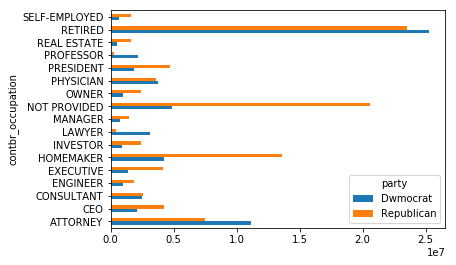

In [125]:
over_2mm.plot(kind='barh')